In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# support vector classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = svm.predict(X_test)

In [11]:
report = classification_report(y_test, y_pred)

In [12]:
print("classification report:\n", report)

classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [13]:
matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n", matrix)

confusion matrix:
 [[41  2]
 [ 3 68]]


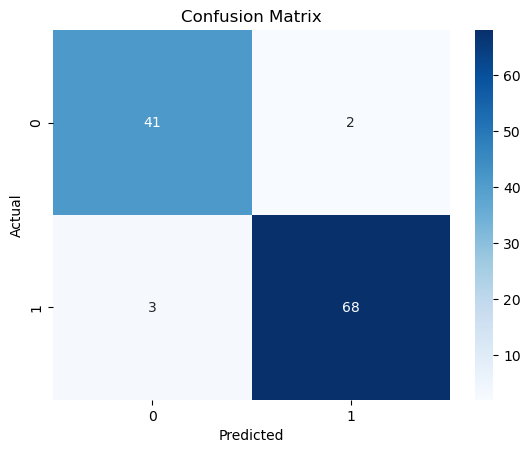

In [14]:
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(scaler.fit_transform(X))


In [16]:
svm_vis = SVC(kernel='linear', C=1.0)
svm_vis.fit(X_train_pca, y)

SVC(kernel='linear')

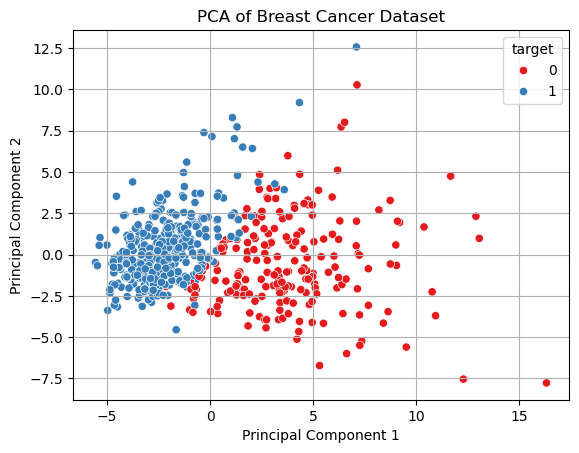

In [22]:
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y, palette='Set1')
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [24]:
X_min, X_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
XX,yy = np.meshgrid(np.linspace(X_min, X_max, 300), np.linspace(y_min, y_max, 300))

In [25]:
Z = svm_vis.predict(np.c_[XX.ravel(), yy.ravel()])
Z = Z.reshape(XX.shape)

In [30]:
# how ravel function works
grid = np.array([[1,2],
                 [3,4]])
print(grid.ravel())

[1 2 3 4]


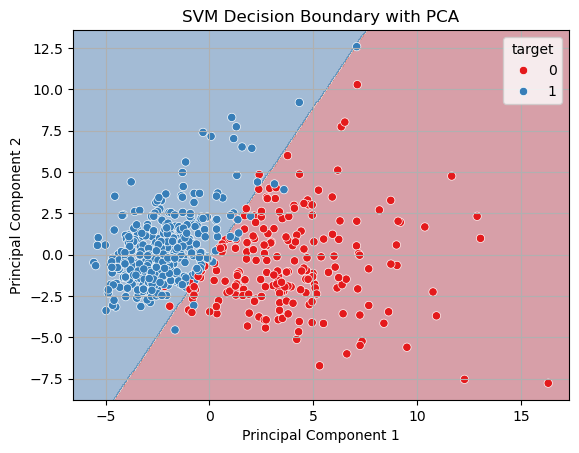

In [31]:
plt.contourf(XX, yy, Z, alpha=0.4, cmap='RdBu')
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y, palette='Set1')
plt.title('SVM Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()